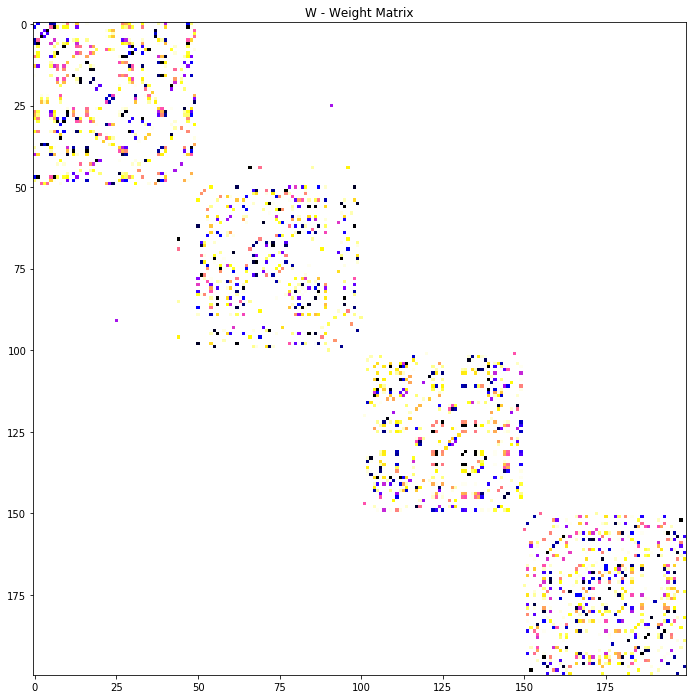

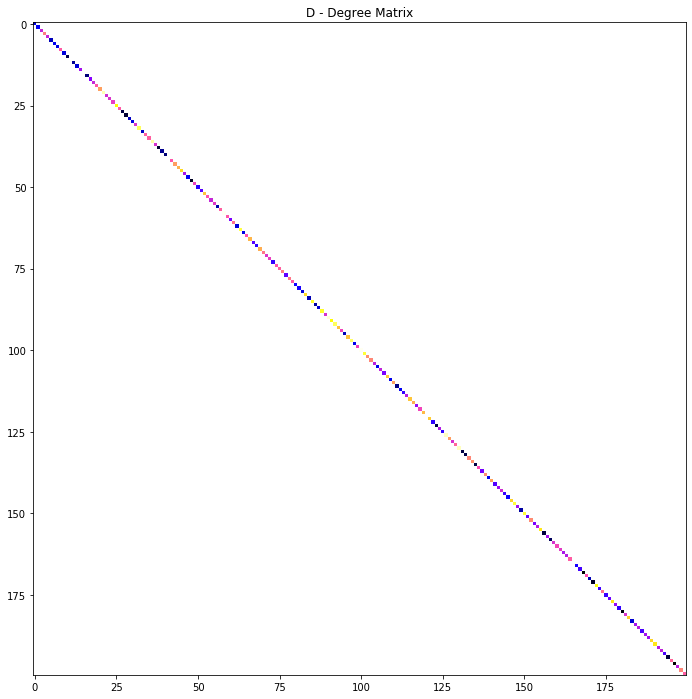

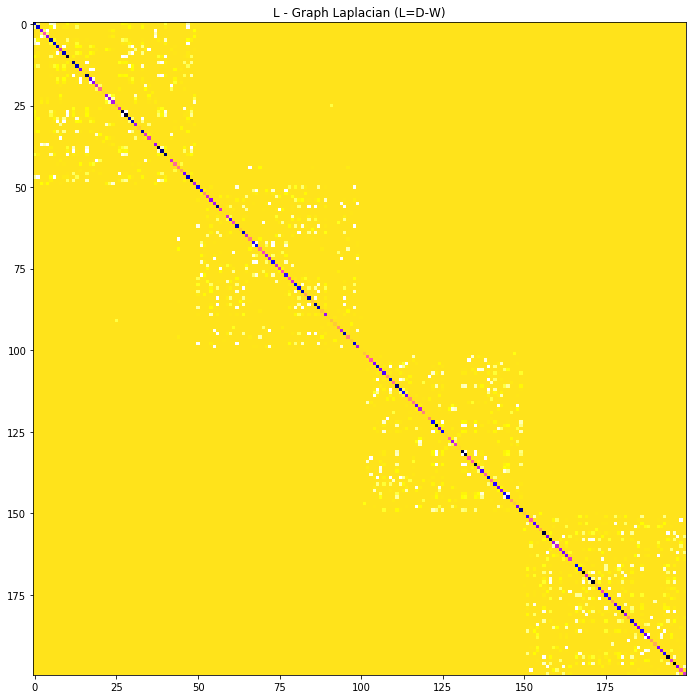

Output of KMeans Clustering


array([[-1.38777878e-17, -1.40732933e-02, -8.07053394e-02,
        -2.37169225e-20],
       [-1.41306264e-01, -9.67360133e-11,  1.68687009e-11,
         6.92843806e-01],
       [-1.41426150e-01, -1.73472348e-17, -6.24500451e-17,
        -2.88440204e-02],
       [ 2.77513568e-11, -9.85134214e-01,  1.71786438e-01,
        -1.36068662e-10]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

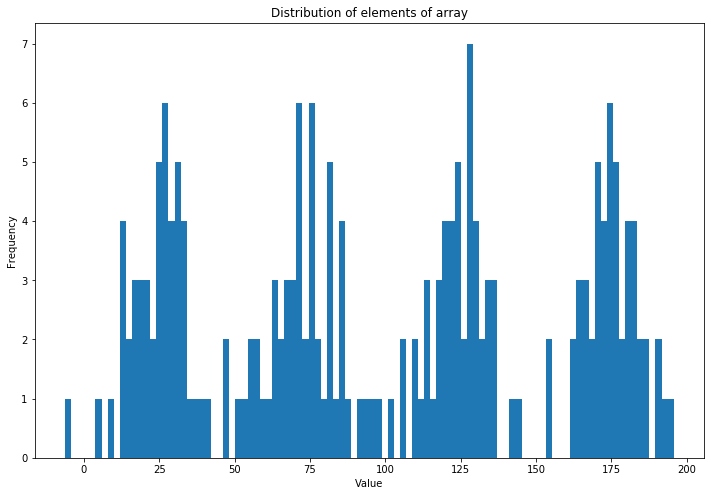

Cluster counts and Ranges:


,Label,count,min,max
3,3,1,-6.298312,-6.298312
0,0,149,4.564843,143.385144
1,1,2,153.903215,154.531580
2,2,48,162.055703,195.687193


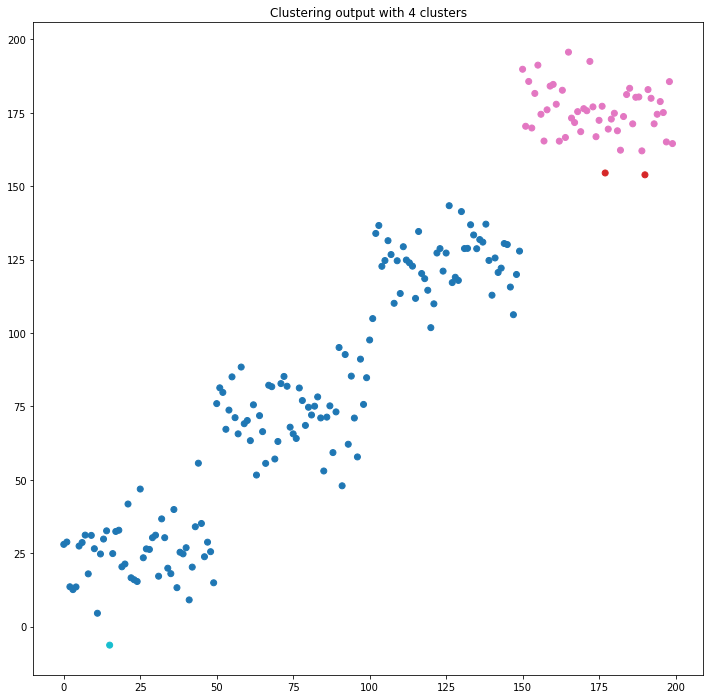

In [5]:
import scipy as sp
import scipy.linalg as linalg
from sklearn.cluster import KMeans
import numpy as np
import spectral_clustering_helper as scplot
import pandas as pd


########################
#       Parameters     #
########################

k=4 #Number of clusters (segments of graphs to create)
dist_centers = [25,75,125,175]
dist_sd = 10
dist_cnt = 50



########################
#       Setup etc      #
########################

#Functions 
def similarity(x,y):
    return sp.exp((-(x-y)**2)/2)

#Initialize Graph Vertices and construct L,D and W
x_list = sp.concatenate([sp.random.normal(c,dist_sd,dist_cnt) for c in dist_centers])

L,W,D = scplot.createMatrices(x_list, similarity)


#Plot L,D and W
scplot.plot_matrix(W, "W - Weight Matrix")
scplot.plot_matrix(D,"D - Degree Matrix")
scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")



########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L)

km = KMeans(n_clusters=k).fit(e_vec[:,0:k])
#km = KMeans(n_clusters=k).fit(e_vec[:,0:k+4])
#km = KMeans(n_clusters=k).fit(e_vec)

print("Output of KMeans Clustering")
display(km.cluster_centers_)
display(km.labels_)



########################
#       Outputs        #
########################

data_cluster = pd.DataFrame({'Data':x_list, 'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').Data.agg(['count','min','max']).reset_index()
data_cluster_result.sort_values('min', inplace=True)

scplot.plot_histo(x_list)

print("Cluster counts and Ranges:")
display(data_cluster_result)
    
scplot.plot_clusters(x_list,km.labels_,"Clustering output with "+str(k)+" clusters")




Interesting observation:

using the first 'k' eigen vectors is the sweet spot. using more vectors degrades the clustering by causing the clusters to be unbalanced and in extreme cases (e.g. using entire vector) the clustering seems to be wrong where one of 4 clusters overlaps the the union of other 3 